# **Efficient Framework for sport result prediction using Machine Learning based on Random Forest comparison with Naive Baye's**

# **Importing necessary libraries and loading the data**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
df=pd.read_csv('athlete_events.csv')

# **Exploratory Data Analysis [EDA]**

In [45]:
#Let's print the first 5 records of the data set
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [46]:
#Let's print the last 5 records of the dataset 
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [47]:
#Let's print the column name
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [48]:
# shape of the dataset
df.shape

(271116, 15)

(271116, 15)

In [49]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Length: 271116, dtype: bool

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Length: 271116, dtype: bool

In [50]:
#Let's print the total number of duplicated value
df.duplicated().sum()

1385

1385

In [51]:
#Let's print the unique values in our dataset
df.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [52]:
#Let's print the data types in our data
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [53]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Sum

<bound method NDFrame.describe of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Sum

In [54]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   

In [55]:
#Let's check the total number of null values present in our dataset 
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

C:\Users\vikram\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vikram\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


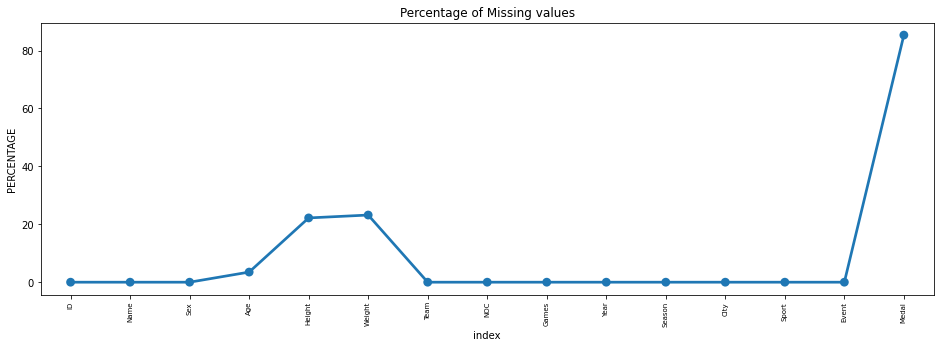

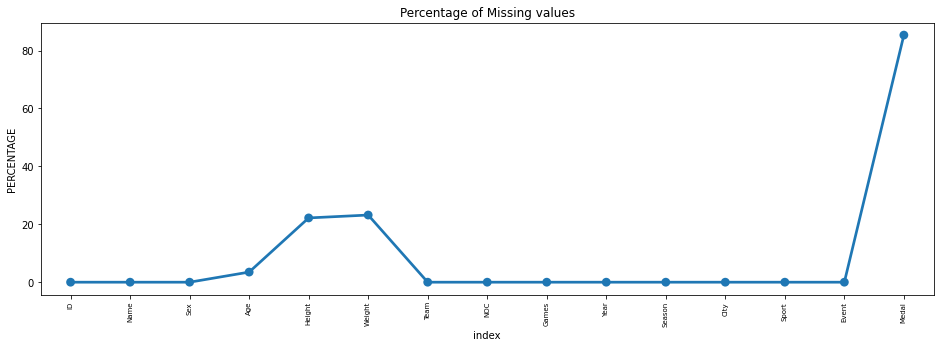

In [56]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

C:\Users\vikram\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vikram\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

<AxesSubplot:ylabel='count'>

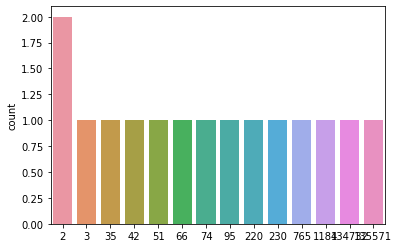

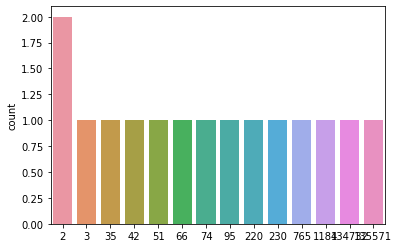

In [57]:
#Plot the unique values

sns.countplot(df.nunique())

C:\Users\vikram\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vikram\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

<AxesSubplot:ylabel='count'>

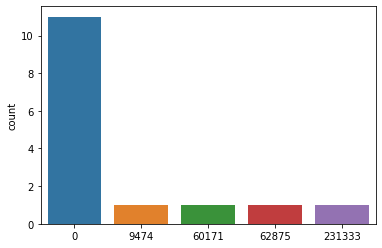

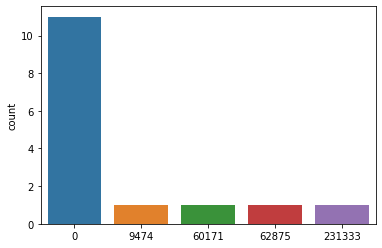

In [58]:
sns.countplot(df.isnull().sum())

In [59]:
import hvplot.pandas
df['Medal'].value_counts().hvplot.bar(
    title="Medal", xlabel='target', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (Medal)

:Bars   [index]   (Medal)

<AxesSubplot:>

<AxesSubplot:>

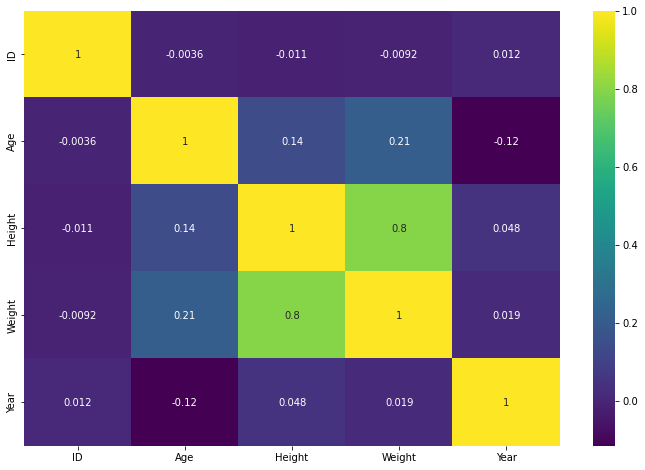

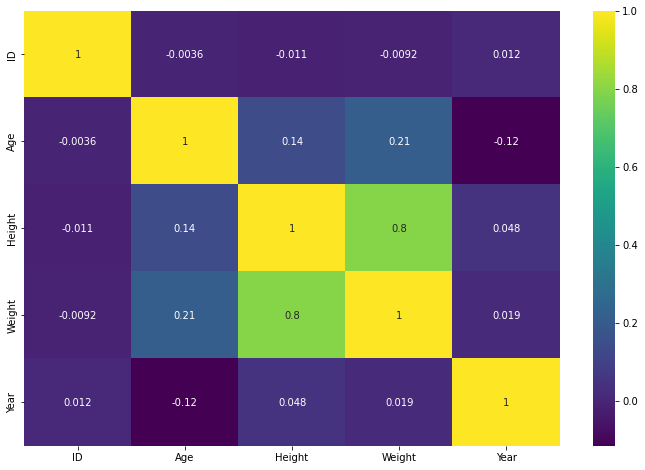

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

<AxesSubplot:>

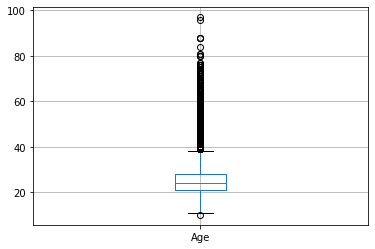

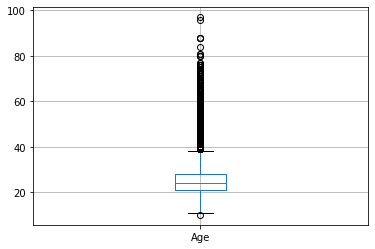

In [61]:
#Boxplot

df[['Age']].boxplot()

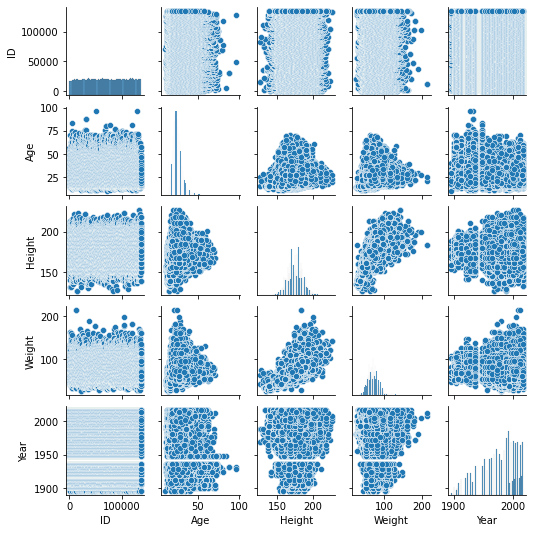

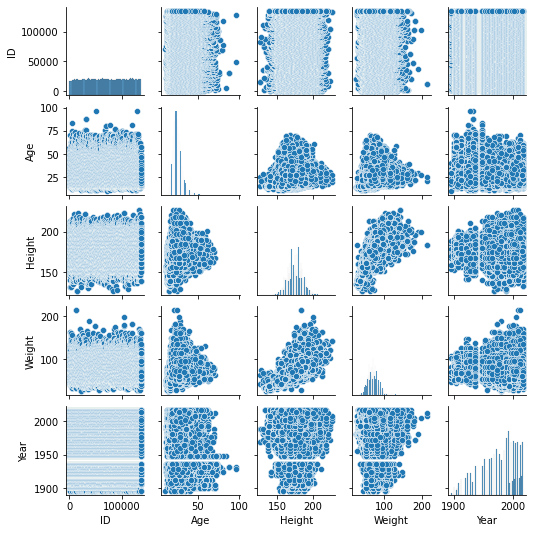

In [62]:
sns.pairplot(df, height=1.5)

In [63]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

# **Data-Preprocessing**

In [64]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [65]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [66]:
#dropping un_necesaary features
df.drop(['ID'], axis=1, inplace=True )
df.drop(['NOC'], axis=1, inplace=True )
df.drop(['Games'], axis=1, inplace=True )

        

In [67]:
#replacing null values through MEAN/MEDIAN/MODE
df.Age.fillna(value=df.Age.ffill()[0],inplace=True)
df.Height.fillna(value=df.Height.ffill()[0],inplace=True)
df.Weight.fillna(value=df.Weight.bfill()[0],inplace=True)
df.Medal.fillna(value=df.Medal.mode()[0],inplace=True)

In [68]:
#applpying encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']= le.fit_transform(df['Name'])
df.replace({'M':1,'F':0},inplace=True)
df['Team']=le.fit_transform(df['Team'])
df.replace({'Summer':0,'Winter':1}, inplace=True)
df['City']=le.fit_transform(df['City'])
df['Sport']=le.fit_transform(df['Sport'])
df['Event']=le.fit_transform(df['Event'])
df.replace({'Gold':1,'Bronze':0,'Silver':2},inplace=True)

In [69]:
x= df.drop(['Medal'],axis=1)
y = df['Medal']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=42)

In [71]:
x_train.tail(1000)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event
204122,18500,1,24.0,180.0,80.0,815,1948,0,17,43,437
192507,28518,0,12.0,180.0,80.0,1095,1928,0,1,20,303
146087,72236,1,19.0,176.0,65.0,1017,1972,0,23,21,319
268630,15127,1,25.0,180.0,80.0,1010,1956,1,10,30,394
120857,129218,1,24.0,180.0,80.0,398,1952,1,25,1,4
...,...,...,...,...,...,...,...,...,...,...,...
63841,86290,0,21.0,169.0,62.0,349,2014,1,34,51,609
194496,111282,0,30.0,180.0,72.0,497,2012,0,17,43,459
176698,41608,1,22.0,175.0,68.0,231,2008,0,6,5,76
36649,94490,1,21.0,180.0,80.0,398,1952,0,13,22,326


,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event
204122,18500,1,24.0,180.0,80.0,815,1948,0,17,43,437
192507,28518,0,12.0,180.0,80.0,1095,1928,0,1,20,303
146087,72236,1,19.0,176.0,65.0,1017,1972,0,23,21,319
268630,15127,1,25.0,180.0,80.0,1010,1956,1,10,30,394
120857,129218,1,24.0,180.0,80.0,398,1952,1,25,1,4
...,...,...,...,...,...,...,...,...,...,...,...
63841,86290,0,21.0,169.0,62.0,349,2014,1,34,51,609
194496,111282,0,30.0,180.0,72.0,497,2012,0,17,43,459
176698,41608,1,22.0,175.0,68.0,231,2008,0,6,5,76
36649,94490,1,21.0,180.0,80.0,398,1952,0,13,22,326


In [72]:
y_train.tail(1000)

204122    1
192507    2
146087    1
268630    1
120857    1
         ..
63841     1
194496    1
176698    1
36649     1
51687     1
Name: Medal, Length: 1000, dtype: int64

204122    1
192507    2
146087    1
268630    1
120857    1
         ..
63841     1
194496    1
176698    1
36649     1
51687     1
Name: Medal, Length: 1000, dtype: int64

In [73]:
x_test.head(500)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event
34238,97662,1,27.0,188.0,86.0,674,1994,1,16,12,177
52239,65512,1,25.0,178.0,72.0,715,2000,0,38,19,277
243368,122684,1,24.0,180.0,80.0,418,1924,0,26,22,335
30717,71109,1,32.0,180.0,80.0,1010,1948,0,17,20,297
169704,41255,1,23.0,174.0,79.0,70,1964,1,14,1,2
...,...,...,...,...,...,...,...,...,...,...,...
238042,95763,0,19.0,151.0,40.0,1083,2000,0,38,27,383
8556,87882,1,25.0,185.0,85.0,173,1996,0,4,14,211
266055,86871,1,32.0,183.0,75.0,65,2000,0,38,29,392
198245,16948,0,25.0,173.0,61.0,1095,2012,0,17,5,147


,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event
34238,97662,1,27.0,188.0,86.0,674,1994,1,16,12,177
52239,65512,1,25.0,178.0,72.0,715,2000,0,38,19,277
243368,122684,1,24.0,180.0,80.0,418,1924,0,26,22,335
30717,71109,1,32.0,180.0,80.0,1010,1948,0,17,20,297
169704,41255,1,23.0,174.0,79.0,70,1964,1,14,1,2
...,...,...,...,...,...,...,...,...,...,...,...
238042,95763,0,19.0,151.0,40.0,1083,2000,0,38,27,383
8556,87882,1,25.0,185.0,85.0,173,1996,0,4,14,211
266055,86871,1,32.0,183.0,75.0,65,2000,0,38,29,392
198245,16948,0,25.0,173.0,61.0,1095,2012,0,17,5,147


In [74]:
y_test.head(500)

34238     1
52239     1
243368    1
30717     1
169704    1
         ..
238042    1
8556      1
266055    0
198245    1
56601     1
Name: Medal, Length: 500, dtype: int64

34238     1
52239     1
243368    1
30717     1
169704    1
         ..
238042    1
8556      1
266055    0
198245    1
56601     1
Name: Medal, Length: 500, dtype: int64

In [75]:
y.value_counts()

1    244705
0     13295
2     13116
Name: Medal, dtype: int64

1    244705
0     13295
2     13116
Name: Medal, dtype: int64

# **Model Building**

# **Machine Learning Models**

# **RandomForest Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc= accuracy_score(y_pred,y_test)
acc

In [ ]:
import pickle
filename = 'RandomForestClassifier.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
model = pickle.load(open(filename, 'rb'))

# **Naive Baye's**

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train[:5000],y_train[:5000])
y_pred=gnb.predict(x_test)
acc= accuracy_score(y_pred,y_test)
acc

In [ ]:
import pickle
filename = 'GaussianNB.sav'
pickle.dump(gnb, open(filename, 'wb'))

In [ ]:
model = pickle.load(open(filename, 'rb'))

In [ ]:
abc=[120379,	1,	27.0,	175.0,	105.0,	611,	1972,	0,	23,	32,	401]
result=gnb.predict([abc])
result=result[0]
if result==0:
    print("The Medal is Bronze")
elif result ==1:
    print("The Medal is Gold")
else:
    print("The Medal is Silver")

In [ ]:
abc=[86871,	1,	32.0,	183.0,	75.0,	65,	2000,	0,	38,	29,	392]
result=rf.predict([abc])
result=result[0]
if result==0:
    print("The Medal is Bronze")
elif result ==1:
    print("The Medal is Gold")
else:
    print("The Medal is Silver")

In [ ]:
abc=[86871,	1,	32.0,	183.0,	75.0,	65,	2000,	0,	38,	29,	392]
result=gnb.predict([abc])
result=result[0]
if result==0:
    print("The Medal is Silver")
elif result ==1:
    print("The Medal is Bronze")
else:
    print("The Medal is Gold")